In [65]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np

In [79]:
import os
import pandas as pd
os.getcwd()

path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"


In [80]:
import pandas as pd
# 📥 Chargement des deux bases
df_proba = pd.read_csv(path + "\\base_predictions_sinistres_complete.csv", sep=";", encoding="utf-8")
df_bdd = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")

# 🔗 Jointure sur 'cle_sin'
df_fusion = df_bdd.merge(
    df_proba[["cle_sin", "sinistre_id_reel", "proba_sinistre_0", "proba_sinistre_1"]],
    on="cle_sin",
    how="left"
)

# 📐 Réorganisation des colonnes : cle_sin en premier, le reste ensuite (sans doublon)
autres_colonnes = [col for col in df_fusion.columns if col != 'cle_sin']
df_fusion = df_fusion[['cle_sin'] + autres_colonnes]

# 💾 Sauvegarde de la base enrichie
df_fusion.to_csv(path + "\\base_sinistres_enrichie.csv", sep=";", encoding="utf-8", index=False)

print("✅ Base fusionnée enregistrée avec 'cle_sin' en première colonne")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_13320\1490663516.py:4: DtypeWarning: Columns (24,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bdd = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")


✅ Base fusionnée enregistrée avec 'cle_sin' en première colonne


In [81]:
df_fusion.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,cdval_g,modele2_g,profess_g,marq_g,garag_g,Region,Zone,sinistre_id_reel,proba_sinistre_0,proba_sinistre_1
0,191840439C A 018,02/01/2019,04/01/2019,O,N,plus_50pc,29/06/1987,09/01/2015,PRO,N,...,V06_7,SUV,Groupe1,Généralistes,Petit garage,Nouvelle-Aquitaine,Ouest,1,0.000717,0.999283
1,191840048C A 001,01/01/2019,02/01/2019,N,N,plus_50pc,10/11/2018,2023-12-31 00:00:00,PRO,N,...,V06_7,Citadine,Groupe2,Autres,Garage moyen,Pays de la Loire,Ouest,1,0.000261,0.999739
2,191840501C A 010,03/01/2019,04/01/2019,O,N,plus_50pc,13/07/2016,03/04/2018,PRO,N,...,V16_33,Berline Premium,Groupe1,Premium,Garage moyen,Pays de la Loire,Ouest,1,0.206399,0.793601
3,191840759C A 001,06/01/2019,07/01/2019,O,N,plus_50pc,25/10/2015,2023-12-31 00:00:00,PRO,N,...,V08_9_10,Monospace,Groupe1,Généralistes,Garage moyen,Pays de la Loire,Ouest,1,0.000105,0.999895
4,191840075AV A 003,01/01/2019,02/01/2019,O,N,plus_50pc,10/06/2015,11/03/2016,PRO,N,...,V11_V15,Autres,Groupe3,Généralistes,Garage moyen,NaN,I,1,0.002004,0.997996


In [82]:
# 📦 Liste des variables à supprimer
vars_to_drop = [
    "date_evt", "date_evt_decla", "date_nais", "age", "date_permis", "Region",
    "profess", "sitfam", "orig_attest", "date_sortie_veh", "age_veh", "usage2", "marq", "modele2", "modele_desc", "caros", "segment", "energ", "num_sra", "bureau_ratt", "fract_paiem_soc", 
    "MT_CHARGE_NETTE", "MT_REGLEMENT_SIN", "MT_REGLEMENT_COM", "MT_ABANDON_RECOURS",
    "MT_FRAIS_HONO", "MT_PROVISIONS", "MT_RECOURS_TOTAL", "MT_ESTIMATION_RECOURS_RESTANTS", "MT_AVANCE_RECOURS",
    "MT_AVANCE_RECOURS_RECOURUS", "MT_PAIEMENTS", "MT_CHARGE_BRUTE_ECO", "MT_CHARGE_NETTE_ECO", "ZN_NO_RAPPORT_EXPTIS",
    "MT_VAL_REMPL_VEH_TTC", "NB_REP", "MT_REMISE", "MT_FORFAIT", "MT_FORFAIT_ERD",
    "veh_info_manquante",
    "date_ord", "date_sortie_veh_imputee", "annee_sortie_veh"
]

# 🧹 Suppression des colonnes
df_cleaned = df_fusion.drop(columns=vars_to_drop, errors="ignore")

# 💾 Sauvegarde de la version nettoyée
df_cleaned.to_csv(path + "base_sinistres_nettoyee.csv", index=False)
print("✅ Base nettoyée enregistrée sous : base_sinistres_nettoyee.csv")

✅ Base nettoyée enregistrée sous : base_sinistres_nettoyee.csv


In [83]:
df_cleaned.head()

,cle_sin,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,anc_permis,sexe,...,fract_paiem_soc_g,cdval_g,modele2_g,profess_g,marq_g,garag_g,Zone,sinistre_id_reel,proba_sinistre_0,proba_sinistre_1
0,191840439C A 018,O,N,plus_50pc,29/06/1987,09/01/2015,PRO,N,58.0,F,...,M,V06_7,SUV,Groupe1,Généralistes,Petit garage,Ouest,1,0.000717,0.999283
1,191840048C A 001,N,N,plus_50pc,10/11/2018,2023-12-31 00:00:00,PRO,N,0.0,M,...,M,V06_7,Citadine,Groupe2,Autres,Garage moyen,Ouest,1,0.000261,0.999739
2,191840501C A 010,O,N,plus_50pc,13/07/2016,03/04/2018,PRO,N,49.0,M,...,M,V16_33,Berline Premium,Groupe1,Premium,Garage moyen,Ouest,1,0.206399,0.793601
3,191840759C A 001,O,N,plus_50pc,25/10/2015,2023-12-31 00:00:00,PRO,N,21.0,M,...,M,V08_9_10,Monospace,Groupe1,Généralistes,Garage moyen,Ouest,1,0.000105,0.999895
4,191840075AV A 003,O,N,plus_50pc,10/06/2015,11/03/2016,PRO,N,28.0,F,...,M,V11_V15,Autres,Groupe3,Généralistes,Garage moyen,I,1,0.002004,0.997996


In [84]:
# Supprimer les colonnes avec une seule modalité dans df
df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]

In [85]:
! pip install statsmodels

In [21]:
import statsmodels.api as sm

In [22]:
import statsmodels.formula.api as smf

# Sélection de variables

In [86]:
# Déterminer les variables qualitatives et quantitatives
quali_vars = df_cleaned.select_dtypes(include=['object']).columns.tolist()
quanti_vars = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", quali_vars)
print("Variables quantitatives :", quanti_vars)

Variables qualitatives : ['cle_sin', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'sexe', 'aac', 'franch', 'rachat_francBG', 'garag', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'crash', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'formule_gar', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', '_RESEAU_', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Zone']
Variables quantitatives : ['anc_permis', 'generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'co2min', 'crm', 'boncond', 'nab50', 'exercice', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_TOTAL_REPARABLE', 'MT_MO_REPARABLE', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'MT_I

In [73]:
quali_vars

['cle_sin',
 'clos',
 'sans_suite',
 'quart_resp',
 'date_premsous',
 'date_dernrempl',
 'formule_ratt',
 'sexe',
 'aac',
 'franch',
 'rachat_francBG',
 'garag',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'formule_gar',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 '_RESEAU_',
 'date_nais_f',
 'date_permis_f',
 'formule_ratt_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'suspe_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'modele2_g',
 'profess_g',
 'marq_g',
 'garag_g',
 'Zone']

In [87]:
quanti_vars

['anc_permis',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'exercice',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_TOTAL_REPARABLE',
 'MT_MO_REPARABLE',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'MT_IP_REPARABLE',
 'NBHH_IP_REPARABLE',
 'MT_PIECES_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'DPT_REP',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'sinistre_id_reel',
 'proba_sinistre_0',
 'proba_sinistre_1']

In [88]:
quanti_vars = [col for col in quanti_vars if col not in ['MT_CHARGE_NETTE_ECO', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'proba_sinistre_0', 'proba_sinistre_1']]
quali_vars = [col for col in quali_vars if col != 'cle_sin']


## Analyse des corrélations des variables quantitatives avec la variable cible

In [76]:
import pandas as pd

# Supposons que df est déjà défini
target_variable = 'MT_TOTAL_REPARABLE'

# Sélectionner les variables numériques
quanti_df = df_cleaned.select_dtypes(include='number')

# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'MT_CHARGE_NETTE_ECO',
    'MT_MO_REPARABLE',
    'MT_IP_REPARABLE',
    'proba_sinistre_0',
    'proba_sinistre_1'
]

# Supprimer les colonnes du DataFrame
quanti_df = quanti_df.drop(columns=colonnes_a_supprimer, errors='ignore')

# Vérifier que la variable cible est bien dans les colonnes
if target_variable not in quanti_df.columns:
    raise ValueError(f"La variable cible '{target_variable}' n'est pas numérique ou absente du DataFrame.")

# Calculer les corrélations avec la variable cible
correlations = quanti_df.corr()[target_variable].drop(target_variable)

# Afficher les résultats triés par ordre décroissant de corrélation
print("Corrélations avec la variable cible MT_TOTAL_REPARABLE :")
print(correlations.sort_values(ascending=False))

Corrélations avec la variable cible MT_TOTAL_REPARABLE :
MT_CHARGE_BRUTE           0.942943
MT_PIECES_REPARABLE       0.837310
NBHH_MO_REPARABLE         0.699318
NB_PIECE_REMPLACEE        0.655954
NBHH_IP_REPARABLE         0.550632
NB_PIECE_REPAREE          0.367320
RE_AVEC_PIECE_REMPL_MP    0.268995
TAUX_HORAIRE_MO           0.201927
sinistre_id_reel          0.195229
val                       0.127209
pdyne                     0.106739
pkw                       0.106729
exercice                  0.105381
MT_PIECES_REEMPLOI        0.097585
vites                     0.097201
couple                    0.092200
boncond                   0.091396
pfisc                     0.087894
pvid                      0.084278
crm                       0.081531
cylin                     0.077435
NB_PIECES_REEMPLOI        0.059334
airbag                    0.034512
RE_AVEC_PIECE_REEMPLOI    0.032468
generation                0.024694
DPT_REP                   0.004521
co2min                   -0.01021

In [ ]:
DPT_REP, co2min

In [ ]:
import scipy.stats as stats
import pandas as pd


# Liste des variables cibles
variables_cibles = ['MT_TOTAL_REPARABLE']

# Initialisation d'un DataFrame pour stocker les p-values
results = []

# Boucler sur chaque variable qualitative
for var_qualitative in quali_vars:
    if df_cleaned[var_qualitative].nunique() < 10:  # Vérification du nombre de modalités
        for var_cible in variables_cibles:
            if var_cible in df_cleaned.columns:
                # Création des groupes pour l'ANOVA
                groupes = [df_cleaned[df_cleaned[var_qualitative] == cat][var_cible] for cat in df_cleaned[var_qualitative].unique()]
                
                # Vérifier que chaque groupe a au moins une valeur
                if all(len(groupe) > 1 for groupe in groupes):
                    anova_result = stats.f_oneway(*groupes)
                    
                    # Stocker les résultats
                    results.append({'Variable Cible': var_cible, 'Variable Qualitative': var_qualitative, 'p-value': anova_result.pvalue})
                    
                    # Affichage des résultats
                    print(f"\nANOVA pour {var_cible} en fonction de {var_qualitative}:")
                    print(f"F-statistique : {anova_result.statistic:.3f}, p-value : {anova_result.pvalue:.3f}")
                    
                    if anova_result.pvalue < 0.05:
                        print("→ La variable qualitative semble avoir un impact significatif !")
                    else:
                        print("→ Pas de corrélation statistiquement significative.")
                else:
                    print(f"→ Problème avec la distribution des groupes pour {var_cible}.")
            else:
                print(f"→ La variable cible {var_cible} n'est pas présente dans le DataFrame.")

# Conversion des résultats en DataFrame pour analyse
df_results = pd.DataFrame(results)

# Affichage final des résultats significatifs
print("\n### Résumé des p-values ###")
print(df_results)

In [49]:
quali_vars

['clos',
 'sans_suite',
 'quart_resp',
 'date_premsous',
 'date_dernrempl',
 'formule_ratt',
 'sexe',
 'aac',
 'franch',
 'rachat_francBG',
 'garag',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'formule_gar',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 '_RESEAU_',
 'date_nais_f',
 'date_permis_f',
 'formule_ratt_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'suspe_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'modele2_g',
 'profess_g',
 'marq_g',
 'garag_g',
 'Zone']

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

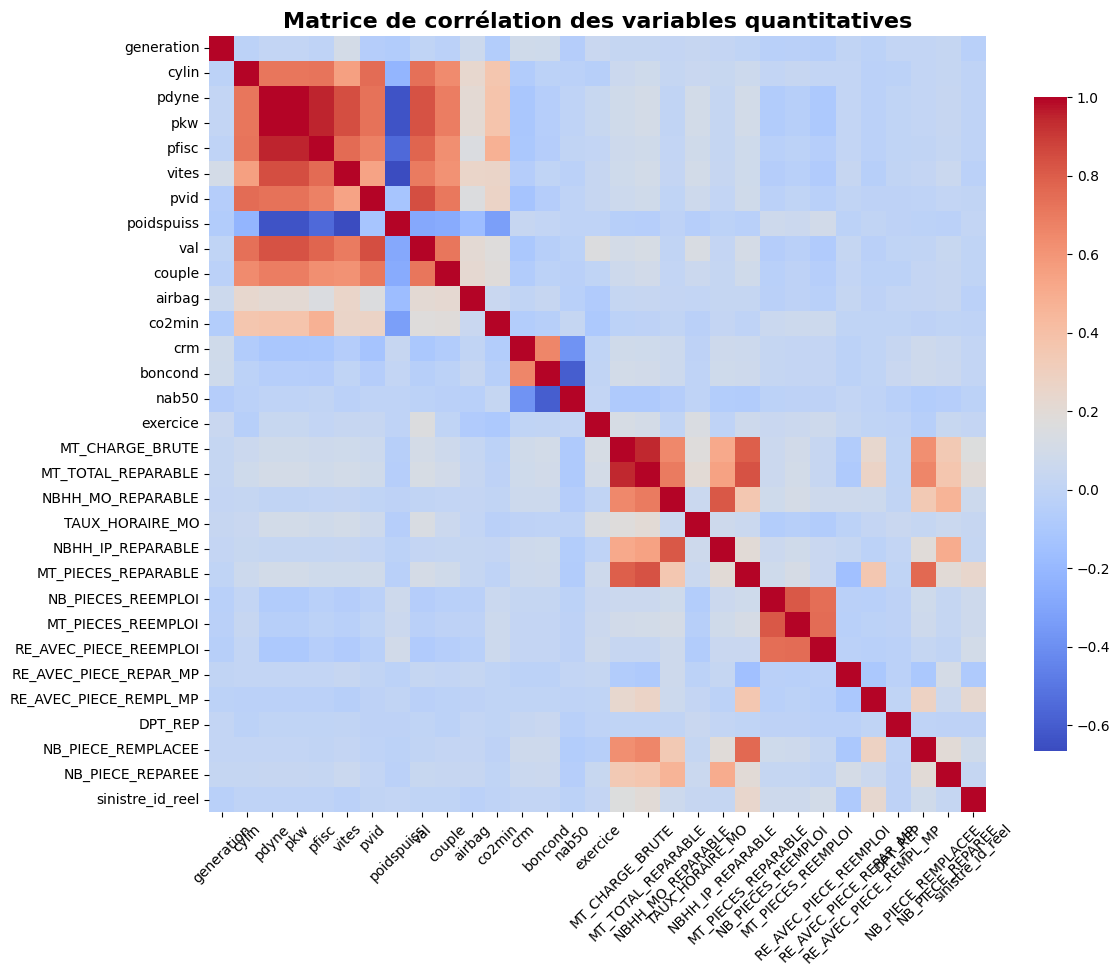

In [31]:
corr_matrix = df_cleaned[quanti_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [93]:
import pandas as pd

# Augmenter les limites d'affichage
pd.set_option('display.max_rows', None)  # Affiche toutes les lignes
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('display.width', None)  # Pas de limite de largeur
pd.set_option('display.max_colwidth', None)  # Affiche tout le contenu des colonnes

# Calculer la matrice de corrélation
corr_matrix = df_cleaned[quanti_vars].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les corrélations fortes
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage complet
print("Paires de variables fortement corrélées (|corr| ≥ 0.5) :")
print(strong_corr_pairs)

Paires de variables fortement corrélées (|corr| ≥ 0.5) :
pkw                     pdyne                     0.999968
pdyne                   pkw                       0.999968
                        pfisc                     0.952911
pfisc                   pdyne                     0.952911
                        pkw                       0.952753
pkw                     pfisc                     0.952753
MT_PIECES_REPARABLE     MT_TOTAL_REPARABLE        0.855995
MT_TOTAL_REPARABLE      MT_PIECES_REPARABLE       0.855995
pvid                    val                       0.849083
val                     pvid                      0.849083
pkw                     vites                     0.845565
vites                   pkw                       0.845565
pdyne                   vites                     0.845405
vites                   pdyne                     0.845405
pkw                     val                       0.835381
val                     pkw                       0.835381

Var à supprimer : DPT_REP, co2min, pdyne, pfisc, pvid, MT_PIECES_REPARABLE,

In [91]:
# Calculer la matrice de corrélation
corr_matrix = df_cleaned[quanti_vars].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations (corrélation d'une variable avec elle-même)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les valeurs supérieures ou égales à 0.5
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage des résultats
print(strong_corr_pairs)


pkw                 pdyne                 0.999968
pdyne               pkw                   0.999968
                    pfisc                 0.952911
pfisc               pdyne                 0.952911
                    pkw                   0.952753
                                            ...   
vites               pvid                  0.538702
NBHH_IP_REPARABLE   MT_TOTAL_REPARABLE    0.536654
MT_TOTAL_REPARABLE  NBHH_IP_REPARABLE     0.536654
NBHH_IP_REPARABLE   NB_PIECE_REPAREE      0.506273
NB_PIECE_REPAREE    NBHH_IP_REPARABLE     0.506273
Length: 88, dtype: float64


## Quali

In [98]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# 🔧 Options d'affichage pour tout voir
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=quali_vars, columns=quali_vars, dtype=np.float32)

for var1 in quali_vars:
    for var2 in quali_vars:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])

# Convertir en float
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]

# ✅ Affichage complet
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\3108752795.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.007771603432877478' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\3108752795.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26442742702714833' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_22068\3108752795.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value

🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :
suspe           suspe_g           1.000000
frein           frein_g           1.000000
suspe_g         suspe             1.000000
frein_g         frein             1.000000
orig_attest_g   aac               0.999695
aac             orig_attest_g     0.999695
systeme         formule_gar       0.998822
formule_gar     systeme           0.998822
systeme         quart_resp        0.883984
quart_resp      systeme           0.883984
formule_ratt_g  formule_gar       0.830897
formule_gar     formule_ratt_g    0.830897
systeme         date_dernrempl    0.731713
date_dernrempl  systeme           0.731713
formule_gar     formule_ratt      0.731545
formule_ratt    formule_gar       0.731545
formule_gar     rachat_francBG    0.721932
rachat_francBG  formule_gar       0.721932
                formule_ratt      0.720004
formule_ratt    rachat_francBG    0.720004
rachat_francBG  formule_ratt_g    0.720002
formule_ratt_g  rachat_francBG    0.7200

Var à supprimer : suspe, frein, orig_attest_g

formule_gar, systeme, formule_ratt, elt_secu segment_g

In [ ]:
# Code pour filtrer les corrélations fortes (≥ 0.4)
import pandas as pd
import numpy as np
import scipy.stats as ss

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Table de contingence
    chi2 = ss.chi2_contingency(contingency_table)[0]  # Calcul du Chi²
    n = contingency_table.sum().sum()  # Nombre total d'observations
    k = min(contingency_table.shape)  # Taille minimale de la table
    return np.sqrt(chi2 / (n * (k - 1)))  # Formule de Cramér V


# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=quali_vars, columns=quali_vars, dtype=np.float32)

for var1 in quali_vars:
    for var2 in quali_vars:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1  # Corrélation parfaite avec soi-même
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(df_cleaned[var1], df_cleaned[var2])

# Convertir en float pour l'affichage
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Supprimer les auto-corrélations
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]  # Filtrer les valeurs fortes

# Affichage des résultats
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)

# Variable à supprimer : 
suspe, frein, orig_attest_g, DPT_REP, co2min, pdyne, pfisc, pvid, MT_PIECES_REPARABLE,

In [89]:
# Liste des variables à supprimer
colonnes_a_supprimer = [
    'suspe', 'frein', 'orig_attest_g', 'DPT_REP', 'rachat_francBG',
    'co2min', 'pdyne', 'pfisc', 'pvid',
    'formule_gar', 'systeme', 'formule_ratt', 'elt_secu segment_g', 'elt_secu',
    'date_premsous', 'date_dernrempl',
    'nab50', 'sousmis_crm', 'prestige', 'vu', 'poidspuiss',
    'sport', 'cdval', 'trans', 'alim', 'boite', 'val', 'couple', 'airbag', 'crash', 'sousmis_crm',
    'date_nais_f', 'date_permis_f', 'luxe', 'clos', 'sans_suite', 'MT_CHARGE_NETTE_ECO'
]

# Supprimer les colonnes de la base
df_cleaned = df_cleaned.drop(columns=colonnes_a_supprimer, errors='ignore')

# ✅ Afficher confirmation
print("✅ Colonnes supprimées de la base :")
for col in colonnes_a_supprimer:
    print(f"- {col}")

✅ Colonnes supprimées de la base :
- suspe
- frein
- orig_attest_g
- DPT_REP
- rachat_francBG
- co2min
- pdyne
- pfisc
- pvid
- formule_gar
- systeme
- formule_ratt
- elt_secu segment_g
- elt_secu
- date_premsous
- date_dernrempl
- nab50
- sousmis_crm
- prestige
- vu
- poidspuiss
- sport
- cdval
- trans
- alim
- boite
- val
- couple
- airbag
- crash
- sousmis_crm
- date_nais_f
- date_permis_f
- luxe
- clos
- sans_suite
- MT_CHARGE_NETTE_ECO


In [90]:
# Enregistrement de la base nettoyée
df_cleaned.to_csv(path + "\\base_sinistres_nettoyee_finale.csv", sep=";", index=False)

In [91]:
df_cleaned.head()

,cle_sin,quart_resp,anc_permis,sexe,aac,franch,garag,generation,cylin,pkw,...,fract_paiem_soc_g,cdval_g,modele2_g,profess_g,marq_g,garag_g,Zone,sinistre_id_reel,proba_sinistre_0,proba_sinistre_1
0,191840439C A 018,plus_50pc,58.0,F,N,P,16154,1.0,898.0,66.0,...,M,V06_7,SUV,Groupe1,Généralistes,Petit garage,Ouest,1,0.000717,0.999283
1,191840048C A 001,plus_50pc,0.0,M,O,B,44188,5.0,1399.0,51.5,...,M,V06_7,Citadine,Groupe2,Autres,Garage moyen,Ouest,1,0.000261,0.999739
2,191840501C A 010,plus_50pc,49.0,M,N,B,44098,1.0,2967.0,180.0,...,M,V16_33,Berline Premium,Groupe1,Premium,Garage moyen,Ouest,1,0.206399,0.793601
3,191840759C A 001,plus_50pc,21.0,M,N,J,49153,2.0,1461.0,78.0,...,M,V08_9_10,Monospace,Groupe1,Généralistes,Garage moyen,Ouest,1,0.000105,0.999895
4,191840075AV A 003,plus_50pc,28.0,F,N,B,49333,1.0,1560.0,84.0,...,M,V11_V15,Autres,Groupe3,Généralistes,Garage moyen,I,1,0.002004,0.997996


## Modele

In [30]:
# 🔍 Liste des variables explicatives (exclure la cible et les colonnes techniques)
exclude_cols = ["MT_TOTAL_REPARABLE", "MT_MO_REPARABLE", "MT_IP_REPARABLE",  "MT_PIECES_REPARABLE", "sinistre_id_reel", "cle_sin", "proba_sinistre_0", "proba_sinistre_1"]
variables = [col for col in df_cleaned.columns if col not in exclude_cols]

# 🧠 Construction de la formule GLM
formula_glm = "MT_TOTAL_REPARABLE ~ " + " + ".join(variables)
print("📋 Formule GLM utilisée :")
print(formula_glm)

📋 Formule GLM utilisée :
MT_TOTAL_REPARABLE ~ clos + sans_suite + quart_resp + sexe + aac + franch + generation + cylin + pkw + vites + pickup + luxe + soumis_crm + crm + petit_rouleur + exercice + GARANTIE_HOST + MT_CHARGE_NETTE_ECO + NBHH_MO_REPARABLE + TAUX_HORAIRE_MO + NBHH_IP_REPARABLE + NB_PIECES_REEMPLOI + MT_PIECES_REEMPLOI + RE_AVEC_PIECE_REEMPLOI + RE_AVEC_PIECE_REPAR_MP + RE_AVEC_PIECE_REMPL_MP + GARAGE_AGREE_O_N + NB_PIECE_REMPLACEE + NB_PIECE_REPAREE + formule_ratt_g + sitfam_g + usage2_g + caros_g + segment_g + energ_g + frein_g + alim_g + suspe_g + crash_g + fract_paiem_soc_g + cdval_g + modele2_g + profess_g + marq_g + garag_g + Zone


In [31]:
df_cleaned.head()

,clos,sans_suite,quart_resp,sexe,aac,franch,generation,cylin,pkw,vites,...,fract_paiem_soc_g,cdval_g,modele2_g,profess_g,marq_g,garag_g,Zone,sinistre_id_reel,proba_sinistre_0,proba_sinistre_1
0,O,N,plus_50pc,F,N,P,1.0,898.0,66.0,171.0,...,M,V06_7,SUV,Groupe1,Généralistes,Petit garage,Ouest,1,0.002923,0.997077
1,N,N,plus_50pc,M,O,B,5.0,1399.0,51.5,162.0,...,M,V06_7,Citadine,Groupe2,Autres,Garage moyen,Ouest,1,0.000687,0.999313
2,O,N,plus_50pc,M,N,B,1.0,2967.0,180.0,250.0,...,M,V16_33,Berline Premium,Groupe1,Premium,Garage moyen,Ouest,1,0.398391,0.601609
3,O,N,plus_50pc,M,N,J,2.0,1461.0,78.0,178.0,...,M,V08_9_10,Monospace,Groupe1,Généralistes,Garage moyen,Ouest,1,0.000972,0.999028
4,O,N,plus_50pc,F,N,B,1.0,1560.0,84.0,183.0,...,M,V11_V15,Autres,Groupe3,Généralistes,Garage moyen,I,1,0.008964,0.991036


In [17]:
print(list(df_cleaned.columns))

['cle_sin', 'clos', 'sans_suite', 'quart_resp', 'sexe', 'aac', 'franch', 'generation', 'cylin', 'pkw', 'vites', 'pickup', 'luxe', 'soumis_crm', 'crm', 'petit_rouleur', 'exercice', 'GARANTIE_HOST', 'MT_CHARGE_NETTE_ECO', 'MT_TOTAL_REPARABLE', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'NB_PIECES_REEMPLOI', 'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Zone', 'sinistre_id_reel', 'proba_sinistre_0', 'proba_sinistre_1']


In [33]:
 #Déterminer les variables qualitatives et quantitatives
num_vars = df_cleaned.select_dtypes(include=['object']).columns.tolist()
quali_vars = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", quali_vars)
print("Variables quantitatives :", quanti_vars)

Variables qualitatives : ['generation', 'cylin', 'pkw', 'vites', 'crm', 'exercice', 'MT_CHARGE_NETTE_ECO', 'MT_TOTAL_REPARABLE', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'NB_PIECES_REEMPLOI', 'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'sinistre_id_reel', 'proba_sinistre_0', 'proba_sinistre_1']
Variables quantitatives : ['generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'co2min', 'crm', 'boncond', 'nab50', 'exercice', 'MT_TOTAL_REPARABLE', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'MT_PIECES_REPARABLE', 'NB_PIECES_REEMPLOI', 'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'DPT_REP', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'sinistre_id_reel']


In [34]:
num_vars = [col for col in num_vars if col not in ['MT_CHARGE_NETTE_ECO', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'proba_sinistre_0', 'proba_sinistre_1']]
quali_vars = [col for col in quali_vars if col != 'cle_sin']


In [35]:
formula_glm = "MT_TOTAL_REPARABLE ~ " + \
    " + ".join(num_vars[1:]) + \
    " + " + " + ".join([f"C({var})" for var in quali_vars])

In [36]:
df_type_1 = df_cleaned[df_cleaned["sinistre_id_reel"] == 1].copy()
df_type_1 = df_type_1[df_type_1["MT_TOTAL_REPARABLE"] > 0]
df_type_1 = df_type_1.dropna(subset=num_vars + quali_vars)

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import gc

gc.collect()  # Nettoyage mémoire

glm_1 = smf.glm(
    formula=formula_glm,
    data=df_type_1,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

print(glm_1.summary())

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MemoryError: Unable to allocate 957. GiB for an array with shape (358406, 358406) and data type float64

In [14]:
# 📊 GLM pour sinistres de type 1
df_type_1 = df_cleaned[df_cleaned["sinistre_id_reel"] == 1]
glm_1 = smf.glm(
    formula=formula_glm,
    data=df_type_1,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MemoryError: Unable to allocate 382. GiB for an array with shape (920097, 55737) and data type float64

In [109]:
df_sample = df_type_1.sample(n=10000, random_state=42)

In [15]:
# 📊 GLM pour sinistres de type 0
df_type_0 = df_cleaned[df_cleaned["sinistre_id_reel"] == 0]
glm_0 = smf.glm(
    formula=formula_glm,
    data=df_type_0,
    family=sm.families.Gamma(sm.families.links.log())
).fit()


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MemoryError: Unable to allocate 25.9 GiB for an array with shape (81748, 42524) and data type float64

In [38]:
cat_vars = df_type_1.select_dtypes(include='object').columns
for var in cat_vars:
    print(f"{var}: {df_type_1[var].nunique()} modalités")

clos: 2 modalités
sans_suite: 2 modalités
quart_resp: 5 modalités
sexe: 2 modalités
aac: 2 modalités
franch: 4 modalités
pickup: 2 modalités
luxe: 2 modalités
soumis_crm: 2 modalités
petit_rouleur: 2 modalités
GARANTIE_HOST: 2 modalités
GARAGE_AGREE_O_N: 2 modalités
formule_ratt_g: 4 modalités
sitfam_g: 4 modalités
usage2_g: 4 modalités
caros_g: 5 modalités
segment_g: 5 modalités
energ_g: 2 modalités
frein_g: 2 modalités
alim_g: 3 modalités
suspe_g: 2 modalités
crash_g: 3 modalités
fract_paiem_soc_g: 3 modalités
cdval_g: 5 modalités
modele2_g: 5 modalités
profess_g: 6 modalités
marq_g: 4 modalités
garag_g: 4 modalités
Zone: 6 modalités


# A REVOIR LES MODELES JUSQU' A STOP

In [39]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import gc

# 🔢 Variables numériques
variables_numeriques = [
    'crm', 'exercice', 'MT_CHARGE_NETTE_ECO', 'MT_TOTAL_REPARABLE',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE',
    'NB_PIECES_REEMPLOI', 'MT_PIECES_REEMPLOI', 'NB_PIECE_REMPLACEE',
    'NB_PIECE_REPAREE'
]

# 🔠 Variables catégorielles à faible cardinalité
variables_categorielle_utiles = [
    'clos', 'sans_suite', 'quart_resp', 'sexe', 'aac', 'franch', 'pickup',
    'luxe', 'soumis_crm', 'petit_rouleur', 'GARANTIE_HOST', 'GARAGE_AGREE_O_N',
    'formule_ratt_g', 'sitfam_g', 'usage2_g', 'caros_g', 'segment_g',
    'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g',
    'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Zone'
]

# 🧼 Nettoyage du DataFrame
df_type_1 = df_cleaned[df_cleaned["sinistre_id_reel"] == 1].copy()
df_type_1 = df_type_1[df_type_1["MT_TOTAL_REPARABLE"] > 0]
df_type_1 = df_type_1.dropna(subset=variables_numeriques + variables_categorielle_utiles)

# 🧮 Construction de la formule GLM
formula_glm = "MT_TOTAL_REPARABLE ~ " + \
    " + ".join(variables_numeriques[1:]) + " + " + \
    " + ".join([f"C({var})" for var in variables_categorielle_utiles])

# 🧠 Nettoyage mémoire
gc.collect()

# 📈 Ajustement du modèle GLM Gamma
glm_1 = smf.glm(
    formula=formula_glm,
    data=df_type_1,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

# 📊 Résumé du modèle
print(glm_1.summary())

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:897: RuntimeWarning: overflow encountered in power
  resid = np.power(self.endog - mu, 2) * self.iweights
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\varfuncs.py:104: RuntimeWarning: overflow encountered in power
  return np.power(np.fabs(mu), self.power)
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\

ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [47]:
# 🧪 Sous-échantillon (par exemple 10%)
df_type_1 = df_type_1.sample(frac=0.1, random_state=42)


In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import gc

# 🔢 Variables numériques
variables_numeriques = [
    'crm', 'exercice', 'MT_CHARGE_NETTE_ECO', 'MT_TOTAL_REPARABLE',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE',
    'NB_PIECES_REEMPLOI', 'MT_PIECES_REEMPLOI', 'NB_PIECE_REMPLACEE',
    'NB_PIECE_REPAREE'
]

# 🔠 Variables catégorielles à faible cardinalité
variables_categorielle_utiles = [
    'clos', 'sans_suite', 'quart_resp', 'sexe', 'aac', 'franch', 'pickup',
    'luxe', 'soumis_crm', 'petit_rouleur', 'GARANTIE_HOST', 'GARAGE_AGREE_O_N',
    'formule_ratt_g', 'sitfam_g', 'usage2_g', 'caros_g', 'segment_g',
    'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g',
    'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Zone'
]

# 🧼 Nettoyage du DataFrame
df_type_1 = df_cleaned[df_cleaned["sinistre_id_reel"] == 1].copy()

# Retirer les sinistres avec montant réparable nul ou manquant
df_type_1 = df_type_1[df_type_1["MT_TOTAL_REPARABLE"] > 0]

# Supprimer les lignes avec des valeurs manquantes
df_type_1 = df_type_1.dropna(subset=variables_numeriques + variables_categorielle_utiles)

# Supprimer les lignes avec des valeurs infinies ou non finies
df_type_1 = df_type_1.replace([np.inf, -np.inf], np.nan)
df_type_1 = df_type_1.dropna()

# Supprimer les colonnes constantes
df_type_1 = df_type_1.loc[:, df_type_1.nunique() > 1]

# Limiter les valeurs extrêmes de la cible
q99 = df_type_1["MT_TOTAL_REPARABLE"].quantile(0.99)
df_type_1 = df_type_1[df_type_1["MT_TOTAL_REPARABLE"] <= q99]

# 🧮 Construction de la formule GLM
formula_glm = "MT_TOTAL_REPARABLE ~ " + \
    " + ".join([var for var in variables_numeriques[1:] if var in df_type_1.columns]) + " + " + \
    " + ".join([f"C({var})" for var in variables_categorielle_utiles if var in df_type_1.columns])

# 🧠 Nettoyage mémoire
gc.collect()

# 📈 Ajustement du modèle GLM Gamma
glm_1 = smf.glm(
    formula=formula_glm,
    data=df_type_1,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

# 📊 Résumé du modèle
print(glm_1.summary())

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MemoryError: 

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import gc

# Variables minimales pour test
variables_numeriques_test = ['crm', 'exercice', 'MT_TOTAL_REPARABLE']
variables_categorielle_test = ['sexe', 'quart_resp', 'GARANTIE_HOST']

# Filtrage et nettoyage
df_type_1 = df_cleaned[df_cleaned["sinistre_id_reel"] == 1].copy()
df_type_1 = df_type_1[df_type_1["MT_TOTAL_REPARABLE"] > 0]
df_type_1 = df_type_1.dropna(subset=variables_numeriques_test + variables_categorielle_test)
df_type_1 = df_type_1.replace([np.inf, -np.inf], np.nan).dropna()

# Échantillon de 10% pour test
df_type_1_sample = df_type_1.sample(frac=0.1, random_state=42)

# Formule simplifiée
formula_test = "MT_TOTAL_REPARABLE ~ crm + exercice + C(sexe) + C(quart_resp) + C(GARANTIE_HOST)"

# Nettoyage mémoire
gc.collect()

# Ajustement du modèle
glm_test = smf.glm(
    formula=formula_test,
    data=df_type_1_sample,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

# Résumé
print(glm_test.summary())

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:     MT_TOTAL_REPARABLE   No. Observations:                92010
Model:                            GLM   Df Residuals:                    92002
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                         0.93552
Method:                          IRLS   Log-Likelihood:            -7.7151e+05
Date:                Thu, 17 Jul 2025   Deviance:                   1.0634e+05
Time:                        17:52:32   Pearson chi2:                 8.61e+04
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02198
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [43]:
! pip install pyglmnet

# STOP ICI

In [58]:
Y1 = dataM['MT_MO_REPARABLE']

In [59]:
X1 = dataM[['pkw', 'age_veh', 'val', 'generation', 'airbag', 'co2min', 'anc_permis',
       'cylin', 'poidspuiss', 'crm', 'nab50','NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO']]

In [60]:
print(X1.dtypes)


pkw                  float64
age_veh              float64
val                  float64
generation           float64
airbag               float64
co2min               float64
anc_permis           float64
cylin                float64
poidspuiss           float64
crm                  float64
nab50                float64
NBHH_MO_REPARABLE    float64
TAUX_HORAIRE_MO      float64
dtype: object


In [61]:
#!pip install pyglmnet
!pip install scipy
from pyglmnet import GLM
from scipy import stats

In [62]:
from pyglmnet import GLM
model = GLM(distr='gamma', alpha=1, reg_lambda=0.01)
import numpy as np

In [63]:
X1 = X1.to_numpy()  # Convertir DataFrame en ndarray
Y1 = Y1.to_numpy()  # Convertir Series en ndarray


In [64]:
model.fit(X1, Y1)  # Réessayer l'ajustement du modèle


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\pyglmnet\pyglmnet.py:92: RuntimeWarning: overflow encountered in exp
  mu = np.log1p(np.exp(z))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\pyglmnet\pyglmnet.py:863: UserWarning: Reached max number of iterations without convergence.
  warnings.warn(


<
Distribution | gamma
alpha | 1.00
max_iter | 1000.00
lambda: 0.01
>

In [65]:
# Predicting the response variable using the fitted model
Y_pred = model.predict(X1)

In [66]:
dataM['Y_pred'] = Y_pred  # Ajouter les prédictions au DataFrame original
# Calculer les résidus 
dataM['residuals'] = dataM['MT_MO_REPARABLE'] - dataM['Y_pred']
# Afficher les 5 premières lignes du DataFrame avec les prédictions et les résidus
print(dataM[['MT_MO_REPARABLE', 'Y_pred', 'residuals']].head(10))


   MT_MO_REPARABLE      Y_pred   residuals
0          598.300         inf        -inf
1           65.000         inf        -inf
2           70.000         inf        -inf
3          227.500  517.094524 -289.594524
4          550.025  677.437458 -127.412458
5          488.025  572.001228  -83.976228
6         1237.000         inf        -inf
7          108.340         inf        -inf
8           62.400         inf        -inf
9          133.000         inf        -inf


In [ ]:
!pip install pyglmnet



In [13]:
!pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [18]:
pip install setuptools

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade setuptools


Note: you may need to restart the kernel to use updated packages.


In [21]:
from setuptools import setup
